# Data Preparation (DataKnight)

Justin Witter
Aug-Sep 2023

## Goal
Prepare data from chess.com API to be used in statistical analysis.

## Table of Contents
1. [Missing Data](#1)
1. [Numeric Features](#2)
1. [Categorical Features](#3)
1. [Feature Selection](#4)
1. [Feature Engineering](#5)


In [135]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# import data
df = pd.read_csv('/kaggle/input/test-data/raw_data (2).csv')
df.head(3)

,Unnamed: 0,game_id,opening,white_rating,black_rating,white_result,black_result,time_class,time_control,rated,rules,pgn
0,0,84658518347,Sicilian-Defense-2.Nf3,1052,1033,resigned,win,rapid,600,True,chess,1. e4 {[%clk 0:09:59.2]} 1... c5 {[%clk 0:09:5...
1,1,84659066903,Kings-Pawn-Opening-Kings-Knight-Variation-2......,997,1059,resigned,win,rapid,600,True,chess,1. e4 {[%clk 0:09:57.6]} 1... e5 {[%clk 0:09:5...
2,2,84659136049,Scandinavian-Defense-2.e5,1068,1069,win,checkmated,rapid,600,True,chess,1. e4 {[%clk 0:10:00]} 1... d5 {[%clk 0:09:57....


## Missing Data <a id="1"></a> 

In [114]:
# check columns, dtypes, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    7968 non-null   int64 
 1   game_id       7968 non-null   int64 
 2   opening       7956 non-null   object
 3   white_rating  7968 non-null   int64 
 4   black_rating  7968 non-null   int64 
 5   white_result  7968 non-null   object
 6   black_result  7968 non-null   object
 7   time_class    7968 non-null   object
 8   time_control  7968 non-null   object
 9   rated         7968 non-null   bool  
 10  rules         7968 non-null   object
 11  pgn           7956 non-null   object
dtypes: bool(1), int64(4), object(7)
memory usage: 692.7+ KB


In [115]:
# show percent of nulls in each column
df.isnull().mean()*100

Unnamed: 0      0.000000
game_id         0.000000
opening         0.150602
white_rating    0.000000
black_rating    0.000000
white_result    0.000000
black_result    0.000000
time_class      0.000000
time_control    0.000000
rated           0.000000
rules           0.000000
pgn             0.150602
dtype: float64

In [116]:
df = df.astype({'game_id':object}).drop(df.columns[0],axis=1).dropna()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 0 to 7967
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   game_id       7956 non-null   object
 1   opening       7956 non-null   object
 2   white_rating  7956 non-null   int64 
 3   black_rating  7956 non-null   int64 
 4   white_result  7956 non-null   object
 5   black_result  7956 non-null   object
 6   time_class    7956 non-null   object
 7   time_control  7956 non-null   object
 8   rated         7956 non-null   bool  
 9   rules         7956 non-null   object
 10  pgn           7956 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 691.5+ KB


### Numeric Features <a id="2"></a> 

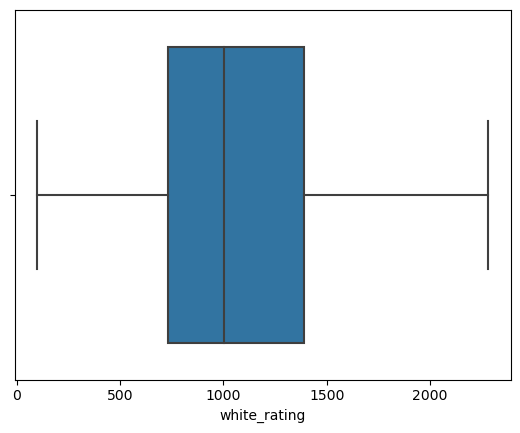

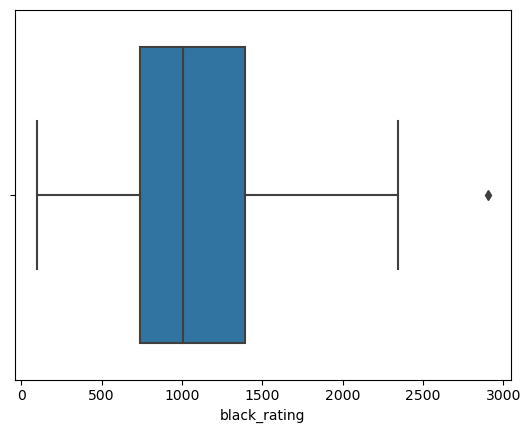

In [118]:
# check univariate distributions for outliers/skew
numeric_features = df.select_dtypes(include=np.number)

for feature in numeric_features:
    sns.boxplot(x=df[feature])
    plt.show()

This dataset has a lot of lower rated games which is good

array([[<Axes: title={'center': 'white_rating'}>,
        <Axes: title={'center': 'black_rating'}>]], dtype=object)

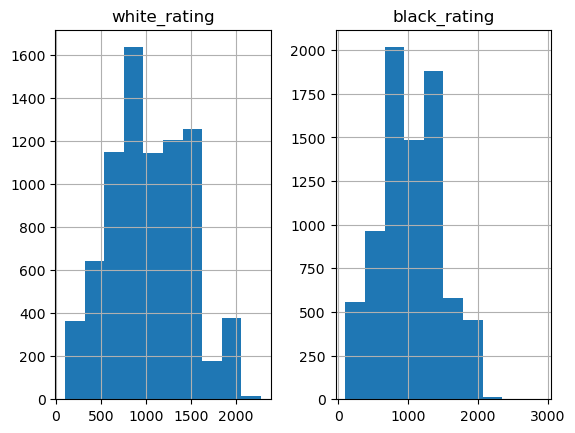

In [119]:
df.hist()

### Categorical Features <a id="3"></a> 

In [131]:
# check value counts for categorical variables
cat_features = df.select_dtypes(exclude=np.number).drop(columns=['pgn'],axis=1)
for feature in cat_features:
    val_counts = df[feature].value_counts(dropna=False)
    print(f'Column: "{feature}" | Categories: {len(val_counts)}\n-------\n{val_counts}\n-------\n\n')

Column: "game_id" | Categories: 7878
-------
84658518347    1
86547003361    1
86545737857    1
86485773827    1
86485122883    1
              ..
85706449649    1
85689021331    1
85678315883    1
85658452949    1
555002299      1
Name: game_id, Length: 7878, dtype: int64
-------


Column: "opening" | Categories: 1997
-------
Modern-Defense-with-1-e4-2.Nf3                                             98
Scandinavian-Defense-2.e5                                                  97
Italian-Game                                                               73
Philidor-Defense-3.Bc4                                                     73
Kings-Pawn-Opening-Napoleon-Attack                                         72
                                                                           ..
Kings-Pawn-Opening-Kings-Knight-Elephant-Gambit-3.Nxe5-Bd6-4.d4-dxe4        1
Indian-Game-2.Nc3-g6-3.e4                                                   1
Ruy-Lopez-Opening-Morphy-Defense-Closed-Averbak

In [121]:
df = df[(df['rules']=='chess') & (df['rated'])]

In [130]:
for feature in ['rules','rated']:
    val_counts = df[feature].value_counts(dropna=False)
    print(f'Column: "{feature}" | Categories: {len(val_counts)}\n-------\n{val_counts}\n-------\n\n')

Column: "rules" | Categories: 1
-------
chess    7878
Name: rules, dtype: int64
-------


Column: "rated" | Categories: 1
-------
True    7878
Name: rated, dtype: int64
-------




In [ ]:
# FIX PGN DATA

### Feature Selection <a id="4"></a> 

In [133]:
df = df.drop(columns=['game_id','rules','rated'],axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 7967
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   opening       7878 non-null   object
 1   white_rating  7878 non-null   int64 
 2   black_rating  7878 non-null   int64 
 3   white_result  7878 non-null   object
 4   black_result  7878 non-null   object
 5   time_class    7878 non-null   object
 6   time_control  7878 non-null   object
 7   pgn           7878 non-null   object
dtypes: int64(2), object(6)
memory usage: 553.9+ KB


### Feature Engineering <a id="5"></a> 

In [ ]:
# create qualitative player rankings by binning